In [3]:
pip install refractio[snowflake]

  Using cached https://files.pythonhosted.org/packages/36/7d/526bf66307a2074dbb9bd4f2e688e92465a97018f6478511046c185034b1/refractio-2.1.5.5-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/66/7c/93b2b93ef90642a6a8ecf896d669f8ab5579b36fef7faca730b0c1da6034/pandas-2.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1b/a8/6ffd1f90333dec9a6e08e97894a05a8c2aec56b1e0b73b7a3e21d47d6269/snowflake_connector_python-3.6.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/54/30/c2a907b9443cf42b90c17ad10c1e8fa801975f01cb9764f3f8eb8aea638b/numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ec/57/56b9bcc3c9c6a792fcbaf139543cee77261f3651ca9da0c93f5c1221264b/python_dateutil-2.9.0.post0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fc

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from refractio import snowflake
dataset=snowflake.execute_query(f" SELECT * FROM PHARMA.PUBLIC.PHYSICIAN_FINAL_2")
print(dataset)

User name picked from OS env: amogh.mothkur@fosfor.com
Fetching connections created by amogh.mothkur@fosfor.com user
Connection names fetched ['pharmaconn1', 'PharmaDB', 'Snowflake pharma'], created by amogh.mothkur@fosfor.com
Connection object created: <snowflake.connector.connection.SnowflakeConnection object at 0x7f233034f4f0>
Please close the connection after use!
       PHYSICIAN_ID   IMS_ID      NPI_ID             ADDRESS          STATE   
0           6089037  6089038  1871526343  12400 S Harlem Ave  Palos Heights  \
1           6089037  6089038  1871526343  12400 S Harlem Ave  Palos Heights   
2           6089037  6089038  1871526343  12400 S Harlem Ave  Palos Heights   
3           6089037  6089038  1871526343  12400 S Harlem Ave  Palos Heights   
4           6089037  6089038  1871526343  12400 S Harlem Ave  Palos Heights   
...             ...      ...         ...                 ...            ...   
282523      6315914  6315915  1922040658    6065 Montana Ave        El Paso 

In [11]:
snowflake.execute_query(f" SELECT * FROM PHYSICIAN_FINAL_2")

Exception occurred in execute_query: 'params'


In [10]:
from refractio import snowflake
import matplotlib.pyplot as plt
import pandas as pd
# To read a specific dataset published from a snowflake connection with only top few records.
x=snowflake.execute_query("show USERS;")
print(x)

dataset = snowflake.get_dataframe("physician_final_1")
dataset.columns

#dataset = snowflake.get_dataframe("physician_final_1")
#dataset.columns

Exception occurred in execute_query: 'params'
None
Connection details fetched: {'errorCode': 'CNM-404', 'message': 'Asset not found', 'detailMessage': 'Datasource not found by name physician_final_1', 'timeStamp': '2024-05-23 12:30:37.751', 'api': '/v1/external/getConnConfig/{dataSourceName}/{userId}/{projectId}'}
Ex: 'params'
Exception occurred in reading data_frame from snowflake connection: Exception occurred in creating snowflake connection: Datasource not found by name physician_final_1


AttributeError: 'NoneType' object has no attribute 'columns'

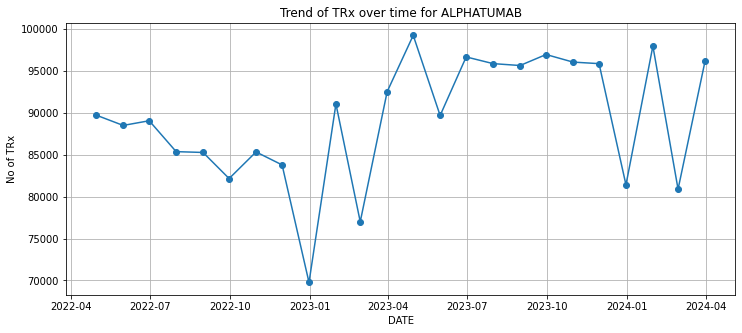

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
alphatumab_data = dataset[dataset['BRAND']=='ALPHATUMAB']
alphatumab_data.loc[:,'DATE'] = pd.to_datetime(alphatumab_data.loc[:,'DATE'])
monthly_data = alphatumab_data.resample('M', on='DATE').sum()
plt.figure(figsize = (12,5))
plt.plot(monthly_data.index , monthly_data['TRX'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for ALPHATUMAB')
plt.xlabel('DATE')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()

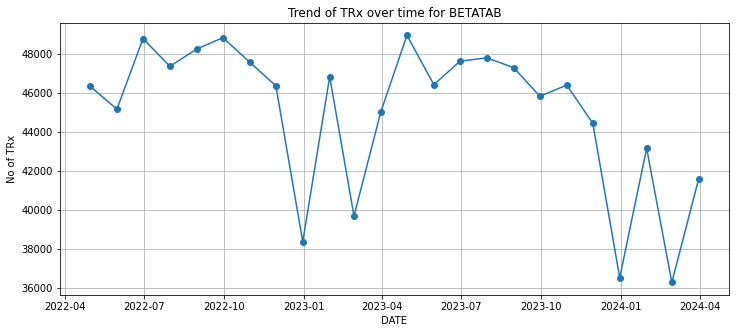

In [7]:
betatab_data = dataset[dataset['BRAND']=='BETATAB']
betatab_data.loc[:,'DATE'] = pd.to_datetime(betatab_data.loc[:,'DATE'])
monthly_data = betatab_data.resample('M', on='DATE').sum()
plt.figure(figsize = (12,5))
plt.plot(monthly_data.index , monthly_data['TRX'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for BETATAB')
plt.xlabel('DATE')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()

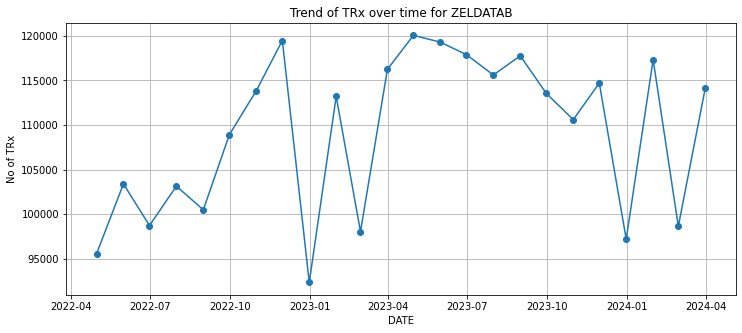

In [8]:
zeldatab_data = dataset[dataset['BRAND']=='ZELDATAB']
zeldatab_data.loc[:,'DATE'] = pd.to_datetime(zeldatab_data.loc[:,'DATE'])
monthly_data = zeldatab_data.resample('M', on='DATE').sum()
plt.figure(figsize = (12,5))
plt.plot(monthly_data.index , monthly_data['TRX'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for ZELDATAB')
plt.xlabel('DATE')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()

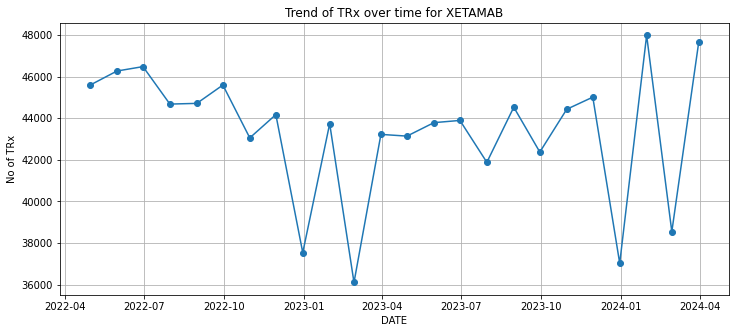

In [9]:
xetamab_data = dataset[dataset['BRAND']=='XETAMAB']
xetamab_data.loc[:,'DATE'] = pd.to_datetime(xetamab_data.loc[:,'DATE'])
monthly_data = xetamab_data.resample('M', on='DATE').sum()
plt.figure(figsize = (12,5))
plt.plot(monthly_data.index , monthly_data['TRX'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for XETAMAB')
plt.xlabel('DATE')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()

In [ ]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
grouped_data = dataset.groupby(['BRAND' , 'REGION', pd.Grouper(key = 'DATE', freq= 'M')]).sum().reset_index()
region_list = grouped_data['REGION'].unique()
brand_list = grouped_data['BRAND'].unique()
fig1,axs1 = plt.subplots(len(region_list), 2 , figsize = (20,20), sharey=True)
fig1.suptitle('Trend over time for diffrent Region and Brand')

for i, region in enumerate(region_list):
    for j, brand in enumerate(brand_list[:2]):
        region_brand_data = grouped_data[(grouped_data['REGION']== region) & (grouped_data['BRAND'] == brand)]
        axs1[i,j].plot(region_brand_data['DATE'], region_brand_data['TRX'] , marker='o' , linestyle='-')
        axs1[i,j].set_title(f'REGION: {region}, BRAND: {brand}')
        axs1[i,j].set_xlable = ('Time')
        axs1[i,j].set_ylable = ('No of TRx')
        axs1[i,j].grid(True)
plt.tight_layout()
plt.show()
fig2,axs2 = plt.subplots(len(region_list), 2 , figsize = (20,20), sharey=True)
fig2.suptitle('Trend over time for diffrent Region and Brand')
for i, region in enumerate(region_list):
    for j, brand in enumerate(brand_list[2:]):
        region_brand_data = grouped_data[(grouped_data['REGION']== region) & (grouped_data['BRAND'] == brand)]
        axs2[i,j].plot(region_brand_data['DATE'], region_brand_data['TRX'] , marker='o' , linestyle='-')
        axs2[i,j].set_title(f'REGION: {region}, BRAND: {brand}')
        axs2[i,j].set_xlable = ('Time')
        axs2[i,j].set_ylable = ('No of TRx')
        axs2[i,j].grid(True)
plt.tight_layout()
plt.show()

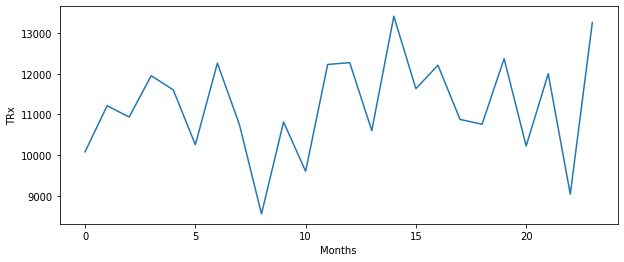

In [7]:
alphatumab_md_data = grouped_data[(grouped_data['BRAND']  == 'ALPHATUMAB') & (grouped_data['REGION'] == 'Mid-Atlantic')]
final_dataset = alphatumab_md_data[['DATE','TRX_DERIVED']]
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("TRx")
plt.plot(final_dataset['TRX_DERIVED'])

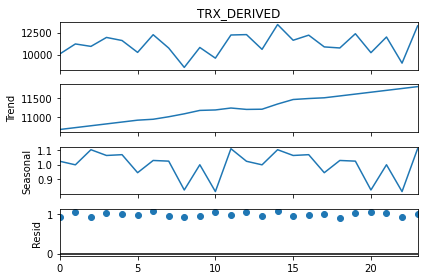

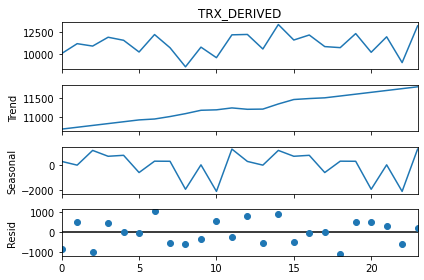

In [12]:
#Decomposing Time series
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompose_multiplicative = seasonal_decompose(final_dataset['TRX_DERIVED'], model = 'multiplicative', period=12, extrapolate_trend = 'freq')
ts_decompose_additive = seasonal_decompose(final_dataset['TRX_DERIVED'], model = 'additive', period=12, extrapolate_trend = 'freq')
#Plotting 
#ts_decompose.show()
ts_plot = ts_decompose_multiplicative.plot()
ts_plot = ts_decompose_additive.plot()

In [11]:
#pip install statsmodels

In [13]:
df_reconstructed = pd.concat([ts_decompose_multiplicative.seasonal, ts_decompose_multiplicative.trend, ts_decompose_multiplicative.resid, ts_decompose_multiplicative.observed], axis = 1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed

,seas,trend,resid,actual_values
0,1.022673,10677.850758,0.923631,10086.0
1,0.998521,10726.886364,1.046959,11214.0
2,1.101430,10775.921970,0.921650,10939.0
3,1.062208,10824.957576,1.039279,11950.0
4,1.067609,10873.993182,0.999382,11602.0
5,0.944902,10923.028788,0.994071,10260.0
6,1.028189,10947.166667,1.089043,12258.0
7,1.023616,11012.791667,0.953528,10749.0
8,0.827160,11090.250000,0.933567,8564.0
9,0.999074,11179.833333,0.968442,10817.0


In [14]:
final_dataset.loc[:,'seasonal'] = ts_decompose_multiplicative.seasonal
final_dataset.loc[:,'trend'] = ts_decompose_multiplicative.trend

<ipython-input-14-d4034ba1c8ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.loc[:,'seasonal'] = ts_decompose_multiplicative.seasonal
<ipython-input-14-d4034ba1c8ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.loc[:,'trend'] = ts_decompose_multiplicative.trend


In [15]:
final_dataset.loc[:,'MAvg_12']= final_dataset.loc[:,'TRX_DERIVED'].rolling(window = 12).mean().shift(1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
final_dataset[['TRX_DERIVED', 'MAvg_12']][12:]

<ipython-input-15-78701c2abd70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.loc[:,'MAvg_12']= final_dataset.loc[:,'TRX_DERIVED'].rolling(window = 12).mean().shift(1)


,TRX_DERIVED,MAvg_12
12,12270,10856.17
13,10605,11038.17
14,13407,10987.42
15,11632,11193.08
16,12207,11166.58
17,10880,11217.00
18,10760,11268.67
19,12368,11143.83
20,10229,11278.75
21,11999,11417.50


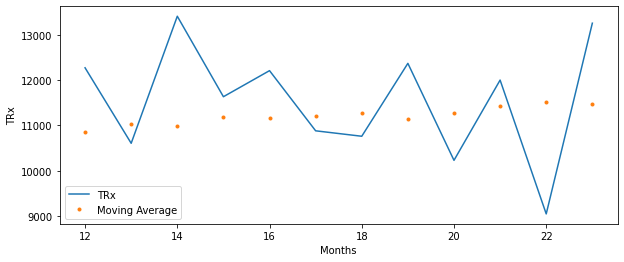

In [16]:
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("TRx")
plt.plot(final_dataset['TRX_DERIVED'][12:])
plt.plot(final_dataset['MAvg_12'][12:], '.')
plt.legend(['TRx','Moving Average'])

In [17]:
#Defining Mape Function
import numpy as np
def get_mape(actual, predicted):
    y_true , y_pred = np.array(actual) , np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/actual))*100, 2)

In [18]:
from sklearn.metrics import mean_squared_error
mse_mavg = np.sqrt(mean_squared_error(final_dataset['TRX_DERIVED'][12:].values , final_dataset['MAvg_12'][12:].values))
mape_mavg = get_mape(final_dataset['TRX_DERIVED'][12:].values , final_dataset['MAvg_12'][12:].values)
print('Mape error in moving average is', mape_mavg , '%.')
print('Mean Squared Error in moving average is', mse_mavg )

Mape error in moving average is 9.96 %.
Mean Squared Error in moving average is 1351.1926641825514


In [19]:
#Exponential Smoothing
final_dataset.loc[:,'EWM'] = final_dataset.loc[:,'TRX_DERIVED'].ewm(alpha = 0.2).mean()
final_dataset[12:]

<ipython-input-19-a9cb28dd75bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.loc[:,'EWM'] = final_dataset.loc[:,'TRX_DERIVED'].ewm(alpha = 0.2).mean()


,DATE,TRX_DERIVED,seasonal,trend,MAvg_12,EWM
12,2023-04-30,12270,1.02,11206.25,10856.17,11114.06
13,2023-05-31,10605,1.00,11211.29,11038.17,11007.56
14,2023-06-30,13407,1.10,11348.12,10987.42,11504.95
15,2023-07-31,11632,1.06,11466.75,11193.08,11531.10
16,2023-08-31,12207,1.07,11492.58,11166.58,11669.39
17,2023-09-30,10880,0.94,11512.00,11217.00,11508.62
18,2023-10-31,10760,1.03,11560.49,11268.67,11356.70
19,2023-11-30,12368,1.02,11609.53,11143.83,11561.32
20,2023-12-31,10229,0.83,11658.56,11278.75,11292.38
21,2024-01-31,11999,1.00,11707.60,11417.50,11434.75


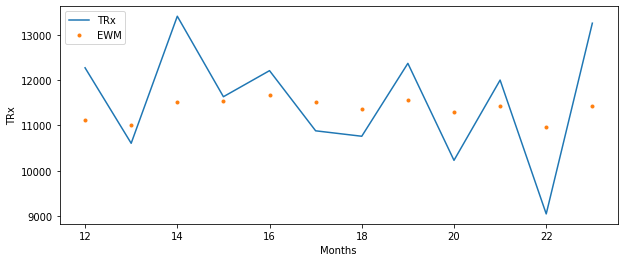

In [20]:
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("TRx")
plt.plot(final_dataset['TRX_DERIVED'][12:])
plt.plot(final_dataset['EWM'][12:], '.')
plt.legend(['TRx','EWM'])

In [21]:
mse_ewm = np.sqrt(mean_squared_error(final_dataset['TRX_DERIVED'][12:].values , final_dataset['EWM'][12:].values))
mape_ewm = get_mape(final_dataset['TRX_DERIVED'][12:].values , final_dataset['EWM'][12:].values)
print('Mape error in exponential smoothing is', mape_ewm , '%.')
print('Mean Squared Error in exponential smoothing is', mse_ewm )
print('Error reduced by', (mape_mavg-mape_ewm)*100/mape_mavg , '%')

Mape error in exponential smoothing is 8.38 %.
Mean Squared Error in exponential smoothing is 1128.4532764426763
Error reduced by 15.863453815261042 %


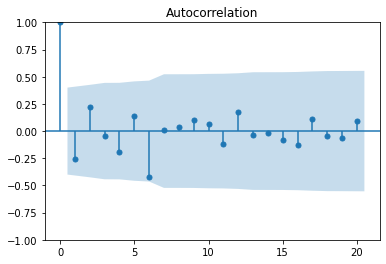

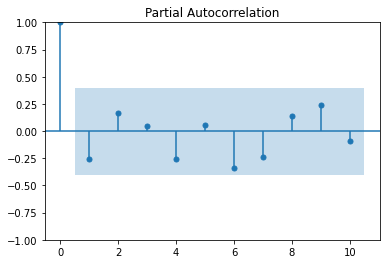

In [22]:
#To identify the value of lag(k)
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

acf_plot = plot_acf(final_dataset.TRX_DERIVED, lags =20)
pacf_plot = plot_pacf(final_dataset.TRX_DERIVED , lags =10)

In [23]:
from statsmodels.tsa.arima.model import ARIMA
arima_model_1 = ARIMA(final_dataset['TRX_DERIVED'][0:12], order=(0,0,0))
ar_model_1 = arima_model_1.fit()
ar_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            TRX_DERIVED   No. Observations:                   12
Model:                          ARIMA   Log Likelihood                -100.627
Date:                Thu, 23 May 2024   AIC                            205.255
Time:                        10:54:10   BIC                            206.225
Sample:                             0   HQIC                           204.896
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.086e+04    333.331     32.569      0.000    1.02e+04    1.15e+04
sigma2      1.114e+06   5.52e+05      2.019      0.043    3.25e+04     2.2e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.54   Prob(JB):                         0.73
Heteroskedasticity (H):               4.51   Skew:                            -0.53
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
forecast_ar_1 = ar_model_1.predict(12,19)
mape_ar_1 = get_mape(final_dataset['TRX_DERIVED'][12:19], forecast_ar_1)
print('Mape error in Auto Regressive model with lag = 0  is', mape_ar_1 , '%.')

Mape error in Auto Regressive model with lag = 0  is 7.4 %.


In [25]:
arima_model_2 = ARIMA(final_dataset['TRX_DERIVED'][0:12], order=(1,0,0))
ar_model_2 = arima_model_2.fit()
forecast_ar_2 = ar_model_2.predict(12,19)
mape_ar_2 = get_mape(final_dataset['TRX_DERIVED'][12:19], forecast_ar_2)
print('Mape error in Auto Regressive model with lag = 1  is', mape_ar_2 , '%.')

Mape error in Auto Regressive model with lag = 1  is 7.73 %.


In [26]:
#ARMA where (p,d,q) where q = 1 , p=0
arima_3 = ARIMA(final_dataset['TRX_DERIVED'][0:12], order=(0,0,1))
ar_model_3 = arima_3.fit()
forecast_arma_3 = ar_model_3.predict(12,18)
mape_arma_3 = get_mape(final_dataset['TRX_DERIVED'][12:19], forecast_arma_3)
print('Mape error in Auto Regressive Moving Average model with lag = 1  is', mape_arma_3 , '%.')

Mape error in Auto Regressive Moving Average model with lag = 1  is 7.63 %.


In [27]:
#ARMA where (p,d,q) where q = 1 , p=1
arima_4 = ARIMA(final_dataset['TRX_DERIVED'][0:12], order=(1,0,1))
ar_model_4 = arima_4.fit()
forecast_arma_4 = ar_model_4.predict(12,18)
mape_arma_4 = get_mape(final_dataset['TRX_DERIVED'][12:19], forecast_arma_4)
print('Mape error in Auto Regressive Moving Average model with lag = 1  is', mape_arma_4 , '%.')

Mape error in Auto Regressive Moving Average model with lag = 1  is 7.22 %.


In [28]:
#ARIMA where (p,d,q) where q = 0 , p=0 , d=1
arima_5 = ARIMA(final_dataset['TRX_DERIVED'][0:12], order=(0,1,0))
ar_model_5 = arima_5.fit()
forecast_arima = ar_model_5.predict(12,18)
mape_arma_5 = get_mape(final_dataset['TRX_DERIVED'][12:19], forecast_arima)
print('Mape error in Auto Regressive Integarted Moving Average model with lag = 0  is', mape_arma_5, '%.')

Mape error in Auto Regressive Integarted Moving Average model with lag = 0  is 7.96 %.


In [29]:
#Predict for future values using ARMA
from statsmodels.tsa.arima.model import ARIMA
arima_final = ARIMA(final_dataset['TRX_DERIVED'][0:24], order=(1,0,1))
ar_model_final = arima_final.fit()
forecast_arma_final = ar_model_final.predict(24,36)
forecast_arma_final

24   10368.80
25   11692.39
26   10897.58
27   11374.86
28   11088.26
29   11260.36
30   11157.01
31   11219.07
32   11181.81
33   11204.19
34   11190.75
35   11198.82
36   11193.97
Name: predicted_mean, dtype: float64

In [30]:
import warnings
warnings.filterwarnings("ignore")
brand_unique_values = grouped_data['BRAND'].unique()
region_unique_values = grouped_data['REGION'].unique()
mape_list = []
forcasted_values = []
for brand_i in brand_unique_values:
    for region_i in region_unique_values:
        data = grouped_data[(grouped_data['BRAND']  == brand_i ) & (grouped_data['REGION'] == region_i)]
        brand_wise_data = data[['TRX_DERIVED']].reset_index(drop = True)
        arima_4 = ARIMA(brand_wise_data['TRX_DERIVED'][0:12], order=(1,0,0))
        ar_model_4 = arima_4.fit()
        forecast_arma = ar_model_4.predict(12,19)
        mape_error = get_mape(brand_wise_data['TRX_DERIVED'][12:19], forecast_arma)
        forcasted_values.append([forecast_arma.values, brand_i , region_i])
        mape_list.append([mape_error,brand_i,region_i])
total_mape = 0
for i in range(len(mape_list)):
    total_mape+=mape_list[i][0]
average_mape = total_mape/len(mape_list)
print(average_mape)

7.736071428571428


In [31]:
import warnings
warnings.filterwarnings("ignore")
brand_unique_values = grouped_data['BRAND'].unique()
region_unique_values = grouped_data['REGION'].unique()
forcasted_values = []
for brand_i in brand_unique_values:
    for region_i in region_unique_values:
        data = grouped_data[(grouped_data['BRAND']  == brand_i ) & (grouped_data['REGION'] == region_i)]
        brand_wise_data = data[['TRX_DERIVED']].reset_index(drop = True)
        arima_4 = ARIMA(brand_wise_data['TRX_DERIVED'][0:], order=(1,0,0))
        ar_model_4 = arima_4.fit()
        forecast_arma = ar_model_4.predict(24,36)
        forcasted_values.append([forecast_arma.values, brand_i , region_i])

In [32]:
forcasted_values[0][0]

array([10616.56934623, 11374.81324815, 11156.82313191, 11219.49385126,
       11201.47643317, 11206.65632193, 11205.16713811, 11205.59526863,
       11205.47218393, 11205.50756997, 11205.49739671, 11205.50032146,
       11205.49948061])

In [33]:
forecasted_data = pd.DataFrame(columns=['Brand','Region','Month','Forecasted_TRx'])

for j in range(len(forcasted_values)):
    for i in range(len(forcasted_values[j][0])):
        forecasted_data.loc[len(forecasted_data.index)] = [forcasted_values[j][1], forcasted_values[j][2], 24+i ,forcasted_values[j][0][i]]
            

In [35]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
start_date = datetime(2024, 4 ,1)
forecasted_data.loc[:,'DATE'] = forecasted_data.loc[:,'Month'].apply(lambda x: start_date + relativedelta(months = x-24))
print(forecasted_data)

          Brand        Region  Month  Forecasted_TRx       DATE
0    ALPHATUMAB  Mid-Atlantic     24        10616.57 2024-04-01
1    ALPHATUMAB  Mid-Atlantic     25        11374.81 2024-05-01
2    ALPHATUMAB  Mid-Atlantic     26        11156.82 2024-06-01
3    ALPHATUMAB  Mid-Atlantic     27        11219.49 2024-07-01
4    ALPHATUMAB  Mid-Atlantic     28        11201.48 2024-08-01
..          ...           ...    ...             ...        ...
359    ZELDATAB          West     32        17753.43 2024-12-01
360    ZELDATAB          West     33        17753.42 2025-01-01
361    ZELDATAB          West     34        17753.42 2025-02-01
362    ZELDATAB          West     35        17753.42 2025-03-01
363    ZELDATAB          West     36        17753.42 2025-04-01

[364 rows x 5 columns]


In [201]:
dir(snowflake)

['_Snowflake__connection_details',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_connection',
 'close_connection',
 'con_obj',
 'execute_query',
 'get_connection',
 'get_dataframe']

In [232]:
con = snowflake.get_connection()

Existing connection object fetched: <snowflake.connector.connection.SnowflakeConnection object at 0x7f426ad36a40>
Please close the connection after use!


In [38]:
file = 'forecasted_data.csv'
forecasted_data.to_csv(file , index=False)

In [227]:
cursor = con.cursor()

In [37]:
with open(file , 'rb') as f:
    #snowflake.execute_query(f"use warehouse FOSFOR_SOLUTIONS_WH")
    #snowflake.execute_query(f" use database FDC")
    snowflake.execute_query(f"PUT file://{file} @FDC.INSIGHT_DESIGNER.INSIGHT_STAGE")

User name picked from OS env: vikaskumar.chauhan@fosfor.com
Fetching connections created by vikaskumar.chauhan@fosfor.com user
Connection names fetched ['Snowflake_vikas', 'basket_conn'], created by vikaskumar.chauhan@fosfor.com
Connection object created: <snowflake.connector.connection.SnowflakeConnection object at 0x7f438e3624d0>
Please close the connection after use!
Exception occurred in execute_query: Unknown error


In [237]:
snowflake.execute_query(f"COPY INTO Forecasted_data FROM @INSIGHT_STAGE/{file} FILE_FORMAT = (TYPE = 'csv', SKIP_HEADER = 1)")

Exception occurred in execute_query: 001757 (42601): SQL compilation error:
Table 'FORECASTED_DATA' does not exist


,PHYSICIAN_ID,IMS_ID,NPI_ID,ADDRESS,STATE,CITY,ZIP_CODE,PHYSICIAN_NAME,SPECIALTY,SPECIALTY_GROUP,...,DISTRICT,TERRITORY,SALES_FORCE,CALL_DETAILS,VEEVA_APPROVED_EMAIL,REMOTE_CALLS,TARGET_TYPE,REFILLS,NBRX_DERIVED,TRX_DERIVED
0,6088550,6088551,1912027582,190 N Main St,Natick,MA,1760,Aurobindo Chakraborty,Cardiovascular Diseases,Primary Care Physician,...,"BOSTON METROWEST, MA","BOSTON, MA",Primary Care Specialist,0,0,0,Target,5,2,17
1,6088550,6088551,1912027582,190 N Main St,Natick,MA,1760,Aurobindo Chakraborty,Cardiovascular Diseases,Primary Care Physician,...,"BOSTON METROWEST, MA","BOSTON, MA",Primary Care Specialist,0,0,0,Target,1,1,5
2,6088550,6088551,1912027582,190 N Main St,Natick,MA,1760,Aurobindo Chakraborty,Cardiovascular Diseases,Primary Care Physician,...,"BOSTON METROWEST, MA","BOSTON, MA",Primary Care Specialist,0,0,0,Target,4,5,5
3,6088550,6088551,1912027582,190 N Main St,Natick,MA,1760,Aurobindo Chakraborty,Cardiovascular Diseases,Primary Care Physician,...,"BOSTON METROWEST, MA","BOSTON, MA",Primary Care Specialist,8,3,6,Target,3,2,17
4,6088550,6088551,1912027582,190 N Main St,Natick,MA,1760,Aurobindo Chakraborty,Cardiovascular Diseases,Primary Care Physician,...,"BOSTON METROWEST, MA","BOSTON, MA",Primary Care Specialist,0,0,0,Target,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282523,6324258,6324259,1871584425,413 Owen Dr,Fayetteville,NC,28304,Catherine Margaret Kelly,Pulmonary Disease,Pulmonologist,...,"WILMINGTON, NC","RALEIGH, NC",Primary Care Specialist,0,0,0,Non-Target,4,4,44
282524,6324258,6324259,1871584425,413 Owen Dr,Fayetteville,NC,28304,Catherine Margaret Kelly,Pulmonary Disease,Pulmonologist,...,"WILMINGTON, NC","RALEIGH, NC",Primary Care Specialist,0,0,0,Non-Target,2,1,7
282525,6324258,6324259,1871584425,413 Owen Dr,Fayetteville,NC,28304,Catherine Margaret Kelly,Pulmonary Disease,Pulmonologist,...,"WILMINGTON, NC","RALEIGH, NC",Primary Care Specialist,2,1,1,Non-Target,0,2,2
282526,6324258,6324259,1871584425,413 Owen Dr,Fayetteville,NC,28304,Catherine Margaret Kelly,Pulmonary Disease,Pulmonologist,...,"WILMINGTON, NC","RALEIGH, NC",Primary Care Specialist,3,1,3,Non-Target,5,0,60
